# Malaria Rate Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
report = pd.read_csv('estimated_numbers.csv')
report = report[['Country','Year','No. of cases','No. of deaths','WHO Region']]
report.head()

,Country,Year,No. of cases,No. of deaths,WHO Region
0,Afghanistan,2017,630308[495000-801000],298[110-510],Eastern Mediterranean
1,Algeria,2017,0,0,Africa
2,Angola,2017,4615605[3106000-6661000],13316[9970-16600],Africa
3,Argentina,2017,0,0,Americas
4,Armenia,2017,0,0,Europe


In [3]:
report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country        856 non-null    object
 1   Year           856 non-null    int64 
 2   No. of cases   856 non-null    object
 3   No. of deaths  856 non-null    object
 4   WHO Region     856 non-null    object
dtypes: int64(1), object(4)
memory usage: 33.6+ KB


In [4]:
report.nunique()

Country          107
Year               8
No. of cases     695
No. of deaths    519
WHO Region         6
dtype: int64

In [5]:
# Let's clean the No. of deaths and No. of cases columns
pattern = "(\d*)" 
report['No. of cases'] = report['No. of cases'].str.extract(pattern)[0]
report['No. of deaths'] = report['No. of deaths'].str.extract(pattern)[0]

In [6]:
report[['No. of cases','No. of deaths']] = report[['No. of cases','No. of deaths']].astype('int')

In [7]:
report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country        856 non-null    object
 1   Year           856 non-null    int64 
 2   No. of cases   856 non-null    int32 
 3   No. of deaths  856 non-null    int32 
 4   WHO Region     856 non-null    object
dtypes: int32(2), int64(1), object(2)
memory usage: 26.9+ KB


# Questions
* Which continent has the highest number of deaths caused by malaria?
* Has there been any decrease of the number of deaths over the years?

In [8]:
# Groupby year and WHO Region.
data = report.groupby(['WHO Region', 'Year']).mean()
data

C:\Users\user\AppData\Local\Temp\ipykernel_7420\1643260792.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = report.groupby(['WHO Region', 'Year']).mean()


No. of cases  No. of deaths
WHO Region            Year                             
Africa                2010  4.779321e+06   12861.534884
                      2011  4.653310e+06   11981.604651
                      2012  4.657473e+06   11321.279070
                      2013  4.640263e+06   10809.186047
                      2014  4.538588e+06   10322.837209
                      2015  4.482347e+06    9992.348837
                      2016  4.521590e+06    9559.720930
                      2017  4.637632e+06    9322.046512
Americas              2010  7.843371e+04     115.857143
                      2011  7.000967e+04     113.857143
                      2012  7.125800e+04     111.714286
                      2013  7.328724e+04     113.952381
                      2014  7.138548e+04     109.380952
                      2015  7.698719e+04     110.333333
                      2016  8.297648e+04     116.857143
                      2017  9.593852e+04     124.666667
Eastern Mediterranean 2010  3.039395e+05     576.357143
                      2011  3.148344e+05     519.928571
                      2012  2.918643e+05     523.714286
                      2013  2.731707e+05     482.785714
                      2014  3.257580e+05     610.214286
                      2015  3.132371e+05     620.142857
                      2016  3.222969e+05     583.071429
                      2017  3.160545e+05     592.857143
Europe                2010  1.855556e+01       0.000000
                      2011  7.666667e+00       0.000000
                      2012  2.333333e+00       0.000000
                      2013  3.333333e-01       0.000000
                      2014  2.222222e-01       0.000000
                      2015  0.000000e+00       0.000000
                      2016  0.000000e+00       0.000000
                      2017  0.000000e+00       0.000000
South-East Asia       2010  2.835681e+06    4418.000000
                      2011  2.390622e+06    3639.555556
                      2012  2.075650e+06    3160.666667
                      2013  1.558142e+06    2421.555556
                      2014  1.498848e+06    2682.111111
                      2015  1.552956e+06    2805.000000
                      2016  1.581495e+06    2841.111111
                      2017  1.253909e+06    2191.000000
Western Pacific       2010  1.683069e+05     342.636364
                      2011  1.457017e+05     303.727273
                      2012  1.735953e+05     349.545455
                      2013  1.860885e+05     418.181818
                      2014  2.149210e+05     401.090909
                      2015  1.319434e+05     259.363636
                      2016  1.580251e+05     318.545455
                      2017  1.689848e+05     328.818182

In [9]:
data.reset_index(inplace=True) # reset index
data

,WHO Region,Year,No. of cases,No. of deaths
0,Africa,2010,4.779321e+06,12861.534884
1,Africa,2011,4.653310e+06,11981.604651
2,Africa,2012,4.657473e+06,11321.279070
3,Africa,2013,4.640263e+06,10809.186047
4,Africa,2014,4.538588e+06,10322.837209
5,Africa,2015,4.482347e+06,9992.348837
6,Africa,2016,4.521590e+06,9559.720930
7,Africa,2017,4.637632e+06,9322.046512
8,Americas,2010,7.843371e+04,115.857143
9,Americas,2011,7.000967e+04,113.857143


In [10]:
regions = list(report['WHO Region'].unique())
Mediterranean = data[data['WHO Region'] == 'Eastern Mediterranean']
Africa = data[data['WHO Region'] == 'Africa']
Americas = data[data['WHO Region'] == 'Americas']
Europe = data[data['WHO Region'] == 'Europe']
Asia = data[data['WHO Region'] == 'South-East Asia']
Western_Pacific =data[data['WHO Region'] == 'Western Pacific']


In [11]:
def reset_col(data):
    data.drop(['No. of cases','WHO Region'], axis=1,inplace=True)
    data = data.rename(columns={'No. of deaths':'Africa'})
    return data

In [12]:
Mediterranean

,WHO Region,Year,No. of cases,No. of deaths
16,Eastern Mediterranean,2010,303939.500000,576.357143
17,Eastern Mediterranean,2011,314834.428571,519.928571
18,Eastern Mediterranean,2012,291864.285714,523.714286
19,Eastern Mediterranean,2013,273170.714286,482.785714
20,Eastern Mediterranean,2014,325758.000000,610.214286
21,Eastern Mediterranean,2015,313237.071429,620.142857
22,Eastern Mediterranean,2016,322296.928571,583.071429
23,Eastern Mediterranean,2017,316054.500000,592.857143


In [13]:
Mediterranean = reset_col(Mediterranean)
Mediterranean = Mediterranean.rename(columns={'Africa':'Eastern Mediterranean'})

Africa = reset_col(Africa)
Americas = reset_col(Americas)
Americas = Americas.rename(columns={'Africa':'Americas'})

Europe = reset_col(Europe)
Europe = Europe.rename(columns={'Africa':'Europe'})

Asia = reset_col(Asia)
Asia = Asia.rename(columns={'Africa':'Asia'})

Western_Pacific = reset_col(Western_Pacific)
Western_Pacific = Western_Pacific.rename(columns={'Africa':'Western_Pacific'})


C:\Users\user\AppData\Local\Temp\ipykernel_7420\3488096939.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['No. of cases','WHO Region'], axis=1,inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_7420\3488096939.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['No. of cases','WHO Region'], axis=1,inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_7420\3488096939.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

In [14]:
a = pd.merge(Africa, Europe, how='inner', on='Year')
b = pd.merge(a, Asia, how='inner', on='Year')
c = pd.merge(b, Mediterranean, how='inner', on='Year')
d = pd.merge(c, Western_Pacific, how='inner', on='Year')
e = pd.merge(d, Americas, how='inner', on='Year')

e.set_index('Year', inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_7420\4202726921.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(e.index, rotation = 30)


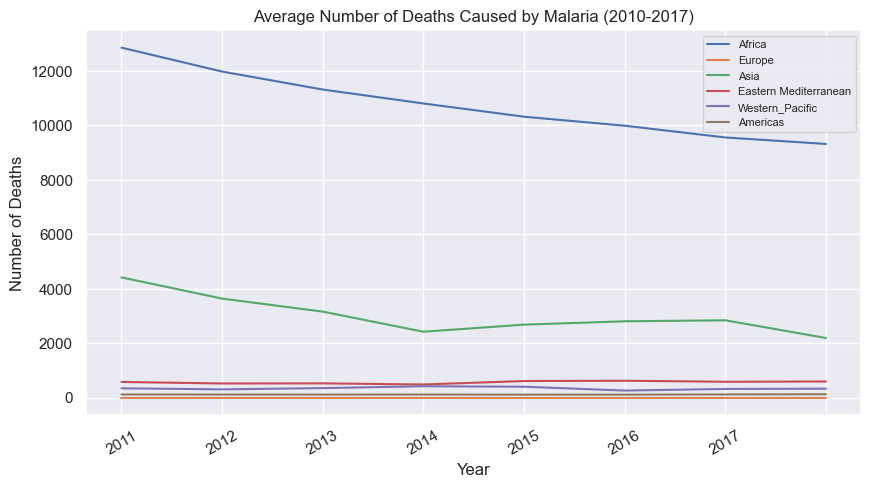

In [18]:
ax = plt.gca()
e.plot(figsize=(10,5),ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('Number of Deaths')
ax.set_title('Average Number of Deaths Caused by Malaria (2010-2017)')
ax.set_xticklabels(e.index, rotation = 30)
legend=ax.legend(fontsize=8)
sns.set()

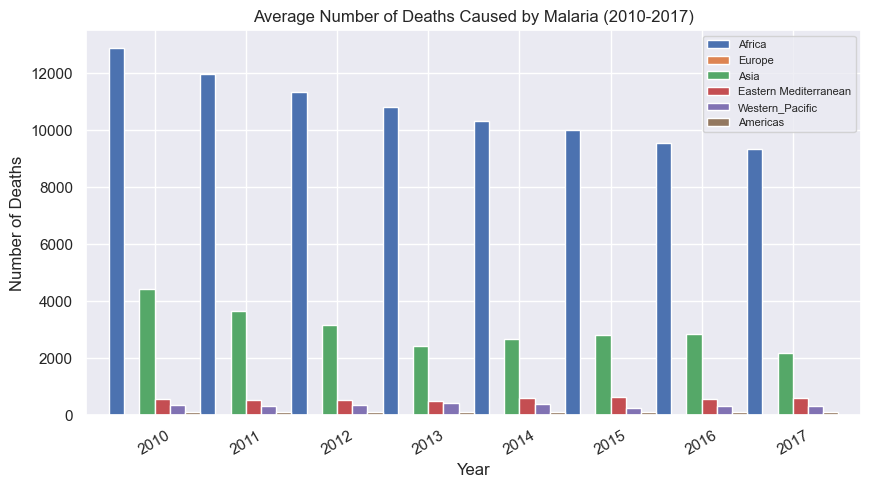

In [20]:
ax = plt.gca()
e.plot(figsize=(10,5),kind='bar',ax=ax, width=1)
ax.set_xlabel('Year')
ax.set_ylabel('Number of Deaths')
ax.set_title('Average Number of Deaths Caused by Malaria (2010-2017)')
ax.set_xticklabels(e.index, rotation = 30)
legend=ax.legend(fontsize=8)

sns.set()

## Summary and Conclusion
* Africa highest numbers of death but has decreased over the years.
* According to the data, Europe has zero numbers of death.